# 911 Calls Project

My goal for this project is to analyze and visualize 911 calls made across the United States in 2016. Some details I want to find include the various reasons a 911 call was made, the frequency of 911 calls made throughout 2016, and how 911 calls differ between weekdays and weekends. The data collected ranges from December 2015 to August 2016.

## Import Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## View Data

In [19]:
df = pd.read_csv('911.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


The dataset contains 99,492 observations, but a few variables have missing values: zip code, township, and address.

In [21]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Exploratory Data Analysis

Some details I find include the most common zip codes and townships that receive 911 calls, various reasons a 911 call was made, etc. I will also create some visualizations in order to convey the information easier.

In [22]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top five most common zip codes that receive 911 calls.

In [23]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Top five most common townships that receive 911 calls.

In [24]:
df['title'].nunique()

110

In [9]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

There are 110 unique reasons that 911 was called, and above is a list of all the reasons.

I created a new column that differentiate the reasons for 911 calls into three categories: EMS, Traffic, and Fire. I believe separating and simplifying the reasons into these three categories will be easier for analysis and visualization.

In [25]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

/Users/kiroshenouda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reason', ylabel='count'>

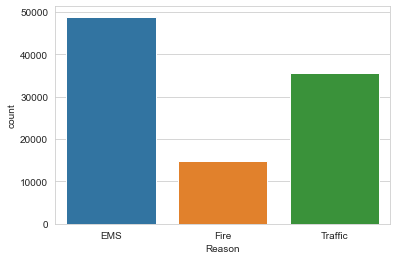

In [28]:
sns.countplot(df['Reason'])

It appears that emergency services (injury, health problems, etc.) were the most common reason 911 was called in the United States in 2016.

In [29]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Since the timeStamp variable is a string, I converted it into a datetime format in order to break it down further into days, months, years, and hours.

In [30]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

I created three other columns for hours, months, and day of the week, respectively.

In [31]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['DayofWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

I coded the days of the week into numbers, with 0 for Monday, and ending with 6 for Sunday.

In [32]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 
        4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [33]:
df['DayofWeek'] = df['DayofWeek'].map(dmap)
df['DayofWeek']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: DayofWeek, Length: 99492, dtype: object

Now that I feature engineered new variables from the timeStamp variable, I would be able to create more visualizations to compare 911 call details across various days and months.

/Users/kiroshenouda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


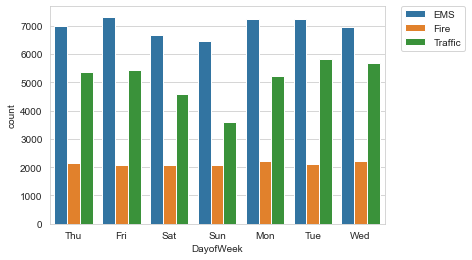

In [34]:
sns.countplot(df['DayofWeek'], hue = df['Reason'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

This barplot shows that EMS is the most common reason why 911 is called throughout the week. Traffic is the second-most common reason, and fire the least common reason. Calls responding to EMS and traffic vary in count compared to calls responding to fire, which appears to be constant or near constant across the week. I also noticed that calls responding to traffic accidents are the lowest during Saturday and Sunday. This may be attributed to the fact that not many people work on the weekend compared to the weekdays, so there is less traffic. Less traffic may mean fewer 911 calls for traffic emergencies.

/Users/kiroshenouda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


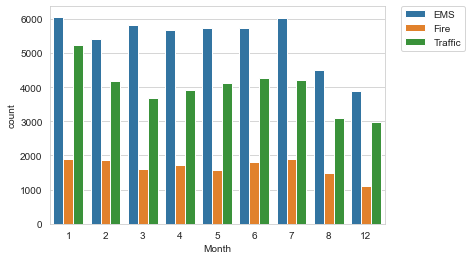

In [35]:
sns.countplot(df['Month'], hue = df['Reason'])
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

This barplot shows a similar pattern than the previous barplot: EMS is the most common reason for a 911 call, with fire being the second-most common, and traffic being the least common. Number of EMS and traffic emergency calls vary from month to month, but fire emergency calls seems to remain relatively constant across the year. One problem with this plot is that months September, October, and November are not showing. Further analysis is required.

Just like the timeStamp variable, I converted the Date variable into a datetime format to perform further analysis on calls made on specific dates.

In [36]:
df['Date'] = df['timeStamp'].apply(lambda d: d.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

I grouped each specific date together based on how many calls was made on each date.

In [37]:
df['Date'].groupby(df['Date']).count()

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: Date, Length: 259, dtype: int64

For the next several visualizations, I created line graphs to show the aggregate of 911 calls made by each month throughout 2016.

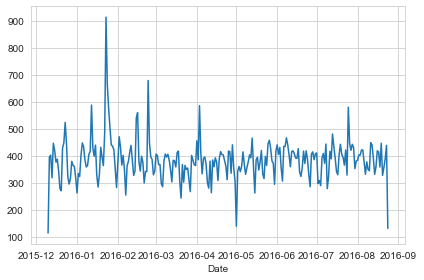

In [38]:
df['Date'].groupby(df['Date']).count().plot()
plt.tight_layout()

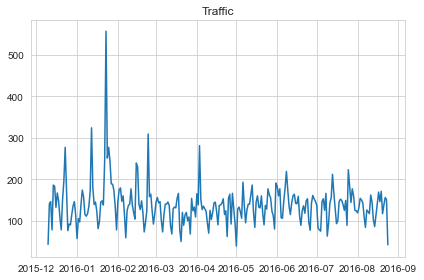

In [39]:
df[df['Reason'] == 'Traffic']['Date'].value_counts().plot()
plt.title('Traffic')
plt.tight_layout()

This line graph shows the distribution of traffic emergency calls made across 2016. Since September, October, and November are not included, the line graphs stop at the end of August. There appears to be a huge spike in traffic emergency calls in late January. This may have been the cause of a winter storm that caused severe damage on streets and highways.

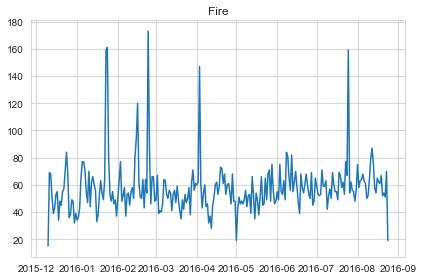

In [40]:
df[df['Reason'] == 'Fire']['Date'].value_counts().plot()
plt.title('Fire')
plt.tight_layout()

Next, this line graph shows the distribution of traffic emergency calls made across 2016. There appears to be four main spikes that occur in the middle of January, middle of February, beginning of April, and end of July. The spike in fire emergency calls in July may have been related to a heat wave.

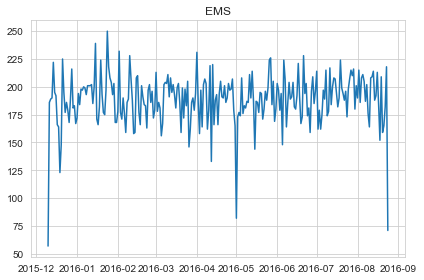

In [41]:
df[df['Reason'] == 'EMS']['Date'].value_counts().plot()
plt.title('EMS')
plt.tight_layout()

Finally, this line graph shows the distribution of traffic emergency calls made across 2016. There appear to be a few spikes, but they are downward spikes, as the general trend of emergency calls hover between 175-200 calls a month. The spikes occur in mid-December of 2015, beginning of May 2016, and middle of August 2016. 

In [42]:
df['Hour'].groupby(df['DayofWeek']).count()

DayofWeek
Fri    14833
Mon    14680
Sat    13336
Sun    12136
Thu    14478
Tue    15150
Wed    14879
Name: Hour, dtype: int64

This breakdown shows the number of 911 calls made each day of the week in 2016. It appears that fewer calls were made during the weekend than on the weekdays.

In [49]:
df['DayofWeek'].groupby(df['Hour']).count()

Hour
0     2112
1     1721
2     1549
3     1435
4     1418
5     1629
6     2513
7     3970
8     5044
9     5314
10    5413
11    5543
12    6029
13    5967
14    5997
15    6154
16    6490
17    6517
18    5762
19    4908
20    4377
21    3788
22    3283
23    2559
Name: DayofWeek, dtype: int64

According to the breakdown of number of 911 calls made each hour, it appears that the top five most common hours a 911 call was made is 5pm, 4pm, 3pm, 12pm, and 2pm. These calls may have been due to a vehicle accident since 4pm and 5pm is when most people go home from work each day. The top five least common hours are between 1am and 5am. This makes sense since relatively more people are asleep between those hours than any other hour of the day.

I created a new variable that groups the days of the week with the number of 911 calls made each hour.

In [52]:
dayHour = df.groupby(by = ['DayofWeek', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayofWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


This table shows the distribution of 911 calls made each hour of each day.

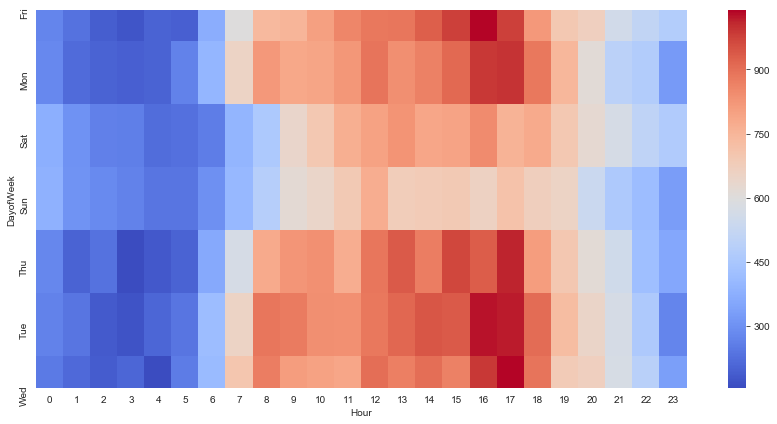

In [38]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayHour, cmap = 'coolwarm')
plt.tight_layout()

I created a heatmap to visualize data in the dayHour variable. The more red a rectangle is, the more 911 calls were made, and the more blue a rectangle is, the fewer 911 calls were made. It appears that fewer 911 calls are made during the weekend than in the weekdays. The most common time a 911 call was made was between 3pm and 5pm on the weekdays.

I created a similar variable called dayMonth that groups the days of the week with the number of 911 calls made each month.

In [54]:
dayMonth = df.groupby(by = ['DayofWeek', 'Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
DayofWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


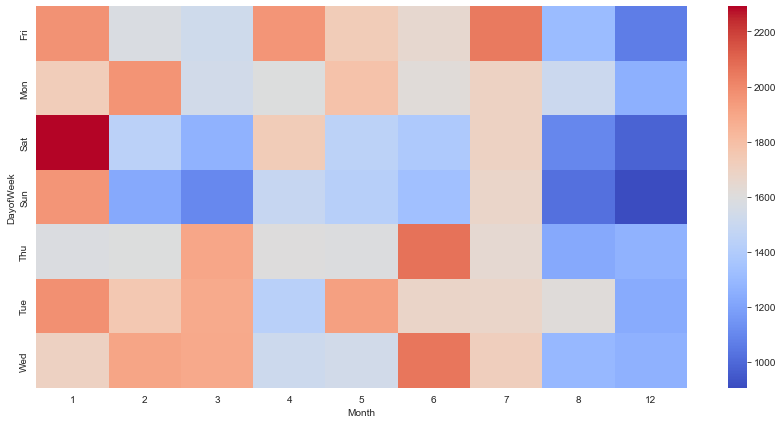

In [56]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayMonth, cmap = 'coolwarm')
plt.tight_layout()

This heatmap shows the density of 911 calls made at a specific day of each month. More 911 calls are generally made between January and March, and fewer during August and December. Further analysis and required to understand why this is the case. There appears to a dark red spot on Saturdays in January, indicating that Saturday was the most common day in January to make a 911 call. This seems to be an outlier for the month of January, and the entire as well.

This project involved me using various Python libraries, mainly Pandas, Matplot, and Seaborn, to analyze and visualize the distribution of 911 calls made across the United States in 2016. I learned that the most common reason to call 911 was EMS, or anything relating to health. The most common time a 911 call was made was during the afternoon on weekdays when most people drive back home from work. The weekends didn't receive as many 911 calls compared to the weekdays. One problem I had with this project was not being able to acquire data for the months of September, October, and November. I believe that by having data for every month, I may have a more clearer picture of 911 call distribution throughout the year.

## Sources


Udemy, "Python for Data Science and Machine Learning Bootcamp" by Jose Portilla